In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer # 处理缺失值
data = pd.read_csv('model data final.csv')
data.set_index('Day',inplace=True)
stock = data
stock.drop(['Year','Season','Month','GDP Season','hs300_close'],axis=1,inplace=True)
stock = stock[pd.isnull(stock['GDP_per_day']) == False]

# fill the missing value 
imputer = SimpleImputer(missing_values= np.NaN , strategy= 'mean')
var_data = imputer.fit_transform(stock)
var_data = pd.DataFrame(var_data)
var_data.columns = stock.columns
var_data.index = stock.index
stock = var_data
stock

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,C,I,G,NX,GDP_per_day
Day,,,,,
2015-01-05,-464.579858,451198098.0,16203.0,601.0,2.637943e+11
2015-01-06,-469.069098,420962185.0,16203.0,601.0,2.713218e+11
2015-01-07,-473.931087,320191232.0,16203.0,601.0,2.715964e+11
2015-01-08,-474.982208,295003045.0,16203.0,601.0,2.651552e+11
2015-01-09,-476.512447,349982672.0,16203.0,601.0,2.637553e+11
...,...,...,...,...,...
2020-09-24,983.609897,112593683.0,14234.0,370.0,3.984571e+11
2020-09-25,989.610921,93015155.0,14234.0,370.0,4.016541e+11
2020-09-28,1015.878191,85048389.0,14234.0,370.0,3.946410e+11


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier  # 随机森林API
from xgboost import XGBRegressor
import lightgbm as lgb
clf1 = GradientBoostingRegressor(loss="ls", n_estimators=1000, max_depth=7)
clf2 = lgb.LGBMRegressor()
clf4 = XGBRegressor()


In [3]:
X = stock.drop('GDP_per_day',axis=1)
y = stock['GDP_per_day']
train_num = 1200

x_train = X[:train_num]
x_test = X[train_num:]
y_train = y[:train_num]
y_test = y[train_num:]

from sklearn.preprocessing import StandardScaler


# # 标准化数据
# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit(x_train).transform(x_test)



# scaler = StandardScaler().fit(pd.DataFrame(y_train))
# y_train = scaler.transform(pd.DataFrame(y_train))

In [4]:
"""fit model"""
model = clf2.fit(x_train, y_train)
pred = model.predict(x_test)
# # 反归一化
# pred = scaler.inverse_transform(pred)
# # y_test = scaler.inverse_transform(y_test.values.reshape(-1,1))
model.score(x_test,y_test)

-0.32555487200018174

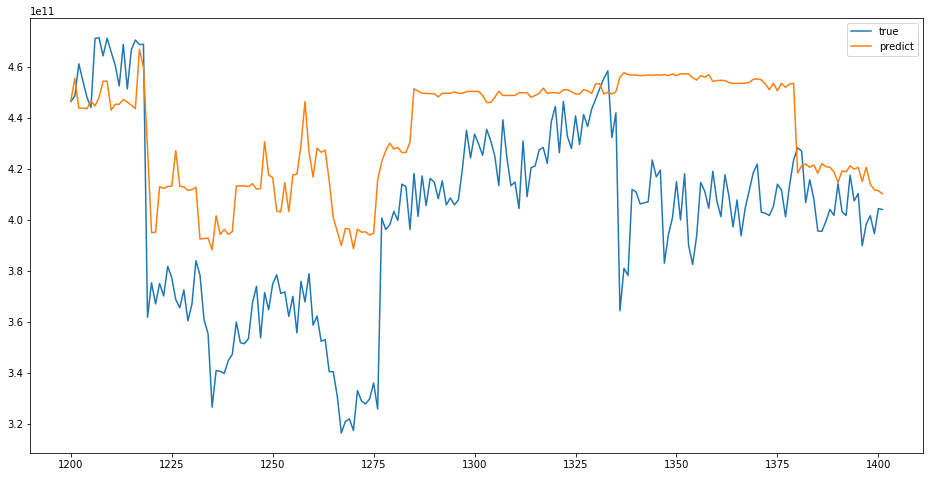

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred,
    'GDP_per_day': y_test
}
data_pd = pd.DataFrame(dict_data)


plt.plot(data_pd['GDP_per_day'],label = 'true')
plt.plot(data_pd['Predictions'],label = 'predict')

# plt.xticks(data_pd.index[::30],stock[train_num:].index[::30])
plt.legend()
plt.show()

In [6]:
####加权最小二乘估计
# The cell may no be excuted
# For every cycle,  reset dataset--(X,Y) and process them as a format readable by specified algprithm
XGB_train, _ = predict(model, x_train, y_train)
#_, LSTM_train = main()
#_, _, RF_train = train(x_train, x_test, y_train, y_test)
#train_target = y_train

# create dataset for linear regression
multi_train = np.zeros([len(XGB_train),3])
for i in range(len(XGB_train)):
    for j in range(3):
        if j == 0:
            mult_train[i][j] = LSTM_train[i]
        elif j == 1:
            mult_train[i][j] = XGB_train[i]
        else:
            mult_train[i][j] = LGB_train[i]

NameError: name 'predict' is not defined